In [1]:
import numpy as np
import tensorflow as tf
np.random.seed(42)
tf.random.set_seed(42)

In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.datasets.mnist import load_data
import matplotlib.pyplot as plt

In [3]:
(x_data,y_data),(t_x_data,t_y_data) = load_data()

In [4]:
x_data.shape 

(60000, 28, 28)

In [5]:
np.unique(y_data)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [6]:
x_data=x_data.reshape(-1,28,28,1)/255.0
tt_x=t_x_data.reshape(-1,28,28,1)/255.0
tt_y=t_y_data
t_x,v_x,t_y,v_y = train_test_split(x_data,y_data,test_size=0.2,random_state=42)

In [7]:
m=keras.Sequential()
m.add(keras.layers.Conv2D(32,kernel_size=3,activation='relu',padding='same'
                          ,input_shape=(28,28,1)))
m.add(keras.layers.MaxPooling2D(2))
m.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
m.add(keras.layers.MaxPooling2D(2))

In [8]:
m.add(keras.layers.Flatten())
m.add(keras.layers.Dense(100,activation='relu'))
m.add(keras.layers.Dropout(0.4))
m.add(keras.layers.Dense(10,activation='softmax'))
m.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

In [9]:
ck_p = keras.callbacks.ModelCheckpoint('Q2.h5', 
                                                save_best_only=True)
e_stopping= keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)
history = m.fit(t_x, t_y, epochs=20,
                    validation_data=(v_x, v_y),
                    callbacks=[ck_p, e_stopping])

Epoch 1/20
1500/1500 [==============================] - 46s 30ms/step - loss: 0.2063 - accuracy: 0.9371 - val_loss: 0.0549 - val_accuracy: 0.9827
Epoch 2/20
1500/1500 [==============================] - 46s 30ms/step - loss: 0.0781 - accuracy: 0.9767 - val_loss: 0.0446 - val_accuracy: 0.9862
Epoch 3/20
1500/1500 [==============================] - 31s 20ms/step - loss: 0.0569 - accuracy: 0.9824 - val_loss: 0.0408 - val_accuracy: 0.9878
Epoch 4/20
1500/1500 [==============================] - 27s 18ms/step - loss: 0.0448 - accuracy: 0.9865 - val_loss: 0.0364 - val_accuracy: 0.9890
Epoch 5/20
1500/1500 [==============================] - 27s 18ms/step - loss: 0.0363 - accuracy: 0.9886 - val_loss: 0.0331 - val_accuracy: 0.9911
Epoch 6/20
1500/1500 [==============================] - 27s 18ms/step - loss: 0.0309 - accuracy: 0.9904 - val_loss: 0.0388 - val_accuracy: 0.9894
Epoch 7/20
1500/1500 [==============================] - 27s 18ms/step - loss: 0.0272 - accuracy: 0.9914 - val_loss: 0.0368 -

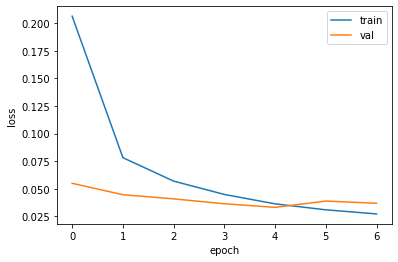

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [11]:
m.evaluate(v_x, v_y)

375/375 [==============================] - 2s 5ms/step - loss: 0.0331 - accuracy: 0.9911


[0.03309982270002365, 0.9910833239555359]

In [12]:
end=list(np.unique(y_data))

In [13]:
y_l=m.predict(tt_x)

7


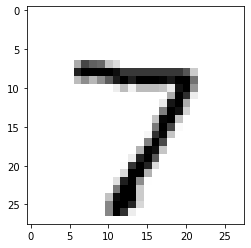

2


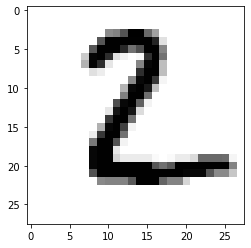

1


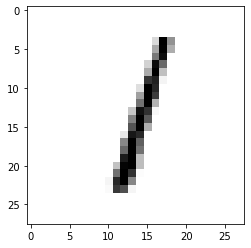

0


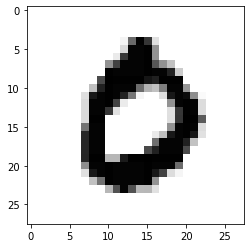

4


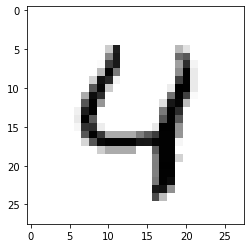

1


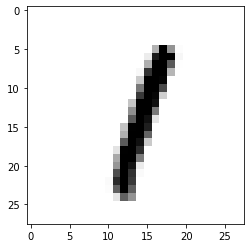

4


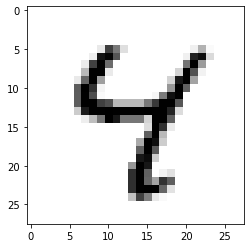

9


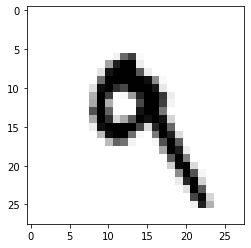

5


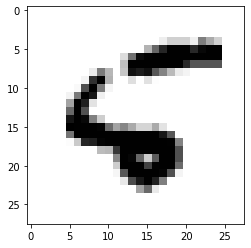

9


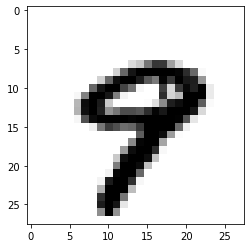

In [14]:
for i in range(len(y_l[100])):
    print(end[np.argmax(y_l[i:i+1])])
    plt.imshow(tt_x[i].reshape(28,28),cmap='gray_r')
    plt.show()

In [15]:
m_ck=keras.models.load_model('Q2.h5')

In [16]:
w1=m_ck.layers[0].weights[0].numpy()

In [17]:
w2=m_ck.layers[2].weights[0].numpy()

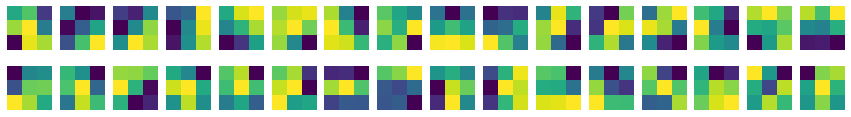

In [18]:
fig, axs = plt.subplots(2,16,figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i,j].imshow(w1[:,:,0,i*16+j])
        axs[i,j].axis('off')

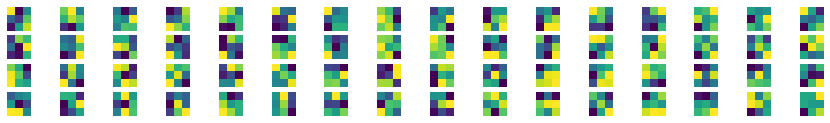

In [19]:
fig, axs = plt.subplots(4,16,figsize=(15,2))
for i in range(4):
    for j in range(16):
        axs[i,j].imshow(w2[:,:,0,i*16+j])
        axs[i,j].axis('off')

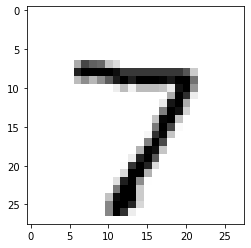

In [20]:
plt.imshow(t_x_data[0],cmap='gray_r')

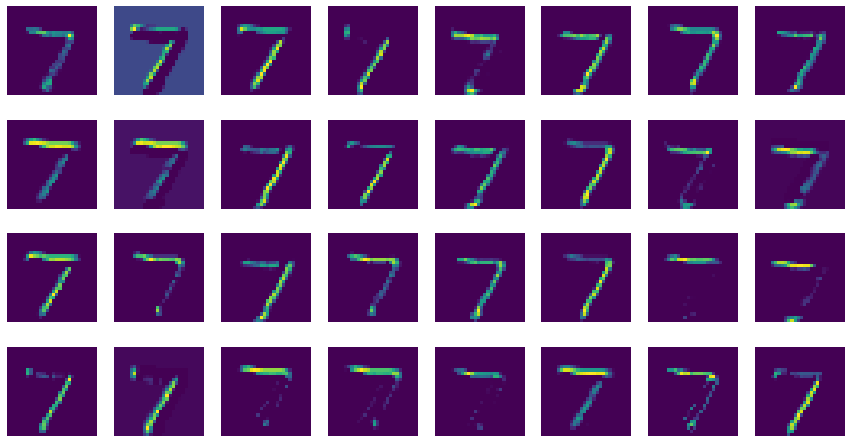

In [21]:
cov_act1=keras.Model(m_ck.input,
                     m_ck.layers[0].output)
f1_map=cov_act1.predict(tt_x[0:1])
fig, axs = plt.subplots(4,8,figsize=(15,8))
for i in range(4):
    for j in range(8):
        axs[i,j].imshow(f1_map[0,:,:,i*8+j])
        axs[i,j].axis('off')

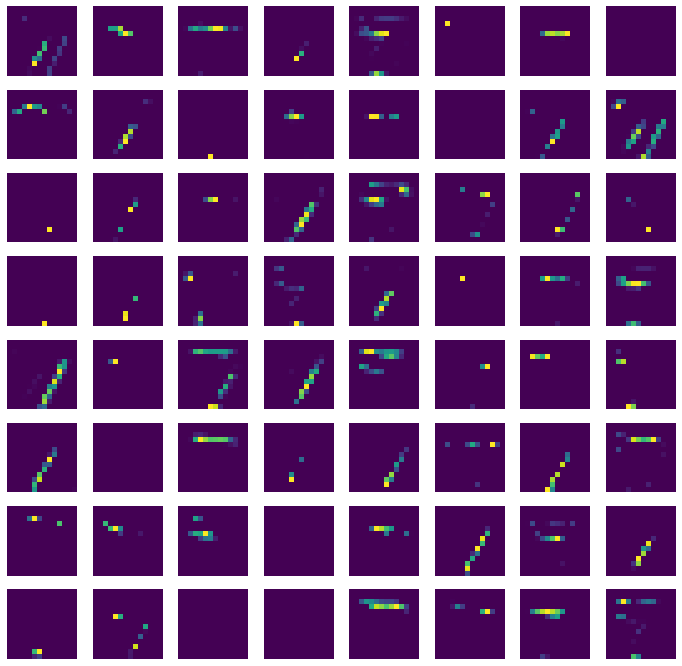

In [22]:
cov_act2=keras.Model(m_ck.input,
                     m_ck.layers[2].output)
f2_map=cov_act2.predict(tt_x[0:1])
fig, axs = plt.subplots(8,8,figsize=(12,12))
for i in range(8):
    for j in range(8):
        axs[i,j].imshow(f2_map[0,:,:,i*8+j])
        axs[i,j].axis('off')
plt.show()